<a href="https://colab.research.google.com/github/pmopedro/computational-chess/blob/pedro/notebooks/pedro_CNN_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Leitura dos dados das partidas de xadrez
proj_folder = '/MyDrive/comp_chess/data/'
datainfo =  "/content/drive/MyDrive/comp_chess/data/chessData.csv" # proj_folder + 'chessData.csv'
df = pd.read_csv(datainfo)

ParserError: ignored

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12958035 entries, 0 to 12958034
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   FEN         object
 1   Evaluation  object
dtypes: object(2)
memory usage: 197.7+ MB


In [5]:

# How this notatio work ? https://en.wikipedia.org/wiki/Forsyth%E2%80%93Edwards_Notation
df.iloc[1,0]

'rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2'

In [6]:
df.tail(3)

,FEN,Evaluation
12958032,r2qkb1r/pp1b1ppp/1nn1p3/3pP3/3P1P2/1BN2N2/PP2Q...,0
12958033,r2qkb1r/pp1b1ppp/1n2p3/n2pP3/3P1P2/1BN2N2/PP2Q...,+115
12958034,r2qkb1r/pp1b1ppp/1n2p3/n2pP3/3P1P2/2N2N2/PPB1Q...,+45


In [3]:
!pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.6 MB/s eta 0:00:00


In [4]:
# Let's try to visualize some boards
import chess
board = chess.Board(df.iloc[1,0])
board

NameError: ignored

In [ ]:
def boardstate(fen):
    board = chess.Board(fen[0])
    fstr = str(fen[0])

    if board.has_kingside_castling_rights(chess.WHITE) == True:
        WCKI = 1
    else:
        WCKI = 0
    if board.has_queenside_castling_rights(chess.WHITE) == True:
        WCQ = 1
    else:
        WCQ = 0
    if board.is_check() == True:
        WCH = 1
    else:
        WCH = 0

    if board.has_kingside_castling_rights(chess.BLACK) == True:
        BCKI = 1
    else:
        BCKI = 0
    if board.has_queenside_castling_rights(chess.BLACK) == True:
        BCQ = 1
    else:
        BCQ = 0
    if board.was_into_check() == True:
        BCH = 1
    else:
        BCH = 0

    #f = [M, WCKI, WCQ, WCH, BCKI, BCQ, BCH]
    fw = [WCKI, WCQ, WCH]
    fb = [BCKI, BCQ, BCH]

    bstr = str(board)
    bstr = bstr.replace("p", "\ -1")
    bstr = bstr.replace("n", "\ -3")
    bstr = bstr.replace("b", "\ -4")
    bstr = bstr.replace("r", "\ -5")
    bstr = bstr.replace("q", "\ -9")
    bstr = bstr.replace("k", "\ -100")
    bstr = bstr.replace("P", "\ 1")
    bstr = bstr.replace("N", "\ 3")
    bstr = bstr.replace("B", "\ 4")
    bstr = bstr.replace("R", "\ 5")
    bstr = bstr.replace("Q", "\ 9")
    bstr = bstr.replace("K", "\ 100")
    bstr = bstr.replace(".", "\ 0")
    bstr = bstr.replace("\ ", ",")
    bstr = bstr.replace("'", " ")
    bstr = bstr.replace("\n", "")
    bstr = bstr.replace(" ", "")
    bstr = bstr[1:]
    bstr = eval(bstr)
    bstr = list(bstr)
    if "w" not in fstr:
        for i in range(len(bstr)):
            bstr[i] = bstr[i] * -1
        bstr.reverse()
        fs = fb
        fb = fw
        fw = fs


    BITBOARD = fw + fb + bstr


    return BITBOARD

In [ ]:
def strfix(fen, tr):

    fstr = str(fen)

    if '#' in str(tr):
        if '-' in tr:
            t = -10000
        else:
            t = 10000
    elif '\ufeff+23' in str(tr):
        t = 0
    else:
        t = int(float(tr))

    if "w" not in fstr:
        t = t*-1



    t = t/10


    return t

In [11]:
# interesting project  https://github.com/niklasf/web-boardimage

In [12]:
def fen_to_board(fen):
    board = []
    for row in fen.split('/'):
        brow = []
        for c in row:
            if c == ' ':
                break
            elif c in '12345678':
                brow.extend( ['--'] * int(c) )
            elif c == 'p':
                brow.append( 'bp' )
            elif c == 'P':
                brow.append( 'wp' )
            elif c > 'Z':
                brow.append( 'b'+c.upper() )
            else:
                brow.append( 'w'+c )

        board.append( brow )
    return board

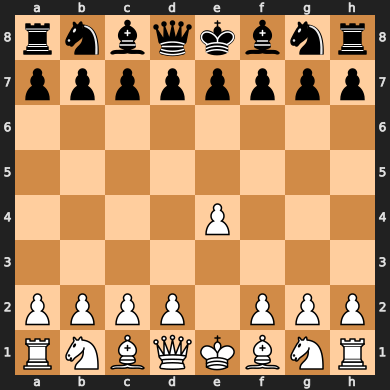

In [13]:
import chess
chess.Board(df.iloc[0,0])

In [14]:
fen_to_board(df.iloc[0,0])

[['bR', 'bN', 'bB', 'bQ', 'bK', 'bB', 'bN', 'bR'],
 ['bp', 'bp', 'bp', 'bp', 'bp', 'bp', 'bp', 'bp'],
 ['--', '--', '--', '--', '--', '--', '--', '--'],
 ['--', '--', '--', '--', '--', '--', '--', '--'],
 ['--', '--', '--', '--', 'wp', '--', '--', '--'],
 ['--', '--', '--', '--', '--', '--', '--', '--'],
 ['wp', 'wp', 'wp', 'wp', '--', 'wp', 'wp', 'wp'],
 ['wR', 'wN', 'wB', 'wQ', 'wK', 'wB', 'wN', 'wR']]

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12958035 entries, 0 to 12958034
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   FEN         object
 1   Evaluation  object
dtypes: object(2)
memory usage: 197.7+ MB


In [17]:
label_columns = [1]

data_features = df.drop(columns=df.iloc[:, label_columns])

data_features = data_features.head(7000000)

# cut out the line below apply the fen check and then cut the collumn containing the fens because right now the evaluation flips are still completely missaligned

#data_labels = data.iloc[:, label_columns]

data_labels = df

data_labels.columns = ['col1', 'col2']



data_labels = data_labels.head(70000000)

data_labels = data_labels.astype(str)
print(data_labels)

data_labels = data_labels.apply(lambda x: strfix(x['col1'], x['col2']), axis=1)


#print(data_features)

print(data_labels)

#print(data_labels.dtypes)

data_features = data_features.apply(boardstate, axis=1)

data_features = data_features.apply(pd.Series)
print(data_features.head())

                                                       col1  col2
0         rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...   -10
1         rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBN...   +56
2         rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBN...    -9
3         rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPP2PPP/RNBQKB...   +52
4         rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPPN1PPP/R1BQK...   -26
...                                                     ...   ...
12958030  r1bqkb1r/pp3ppp/1nn1p3/3pP3/3P1P2/1B3N2/PP2Q1P...    +6
12958031  r2qkb1r/pp1b1ppp/1nn1p3/3pP3/3P1P2/1B3N2/PP2Q1...   +84
12958032  r2qkb1r/pp1b1ppp/1nn1p3/3pP3/3P1P2/1BN2N2/PP2Q...     0
12958033  r2qkb1r/pp1b1ppp/1n2p3/n2pP3/3P1P2/1BN2N2/PP2Q...  +115
12958034  r2qkb1r/pp1b1ppp/1n2p3/n2pP3/3P1P2/2N2N2/PPB1Q...   +45

[12958035 rows x 2 columns]
0            1.0
1            5.6
2            0.9
3            5.2
4            2.6
            ... 
12958030    -0.6
12958031     8.4
12958032     0.0
12958033    11.5
12958034 

In [18]:
# try:
#   df = pd.read_csv("preprocessed.csv")
# except:
#   raise "banana"
# # df.to_csv("preprocessed.csv")

In [19]:
# df= df.drop(columns=["Unnamed: 0"])

In [3]:
data_features = pd.DataFrame(data_features)
data_labels = pd.DataFrame(data_labels)
data_features.to_csv('./drive/MyDrive/comp_chess/data/data_features.csv')
data_labels.to_csv('./drive/MyDrive/comp_chess/data/data_labels.csv')

NameError: ignored

In [3]:
data_features = pd.read_csv("./drive/MyDrive/comp_chess/data/data_features.csv")
data_labels = pd.read_csv("./drive/MyDrive/comp_chess/data/data_labels.csv")

In [4]:
data_features.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
0,0,1,1,0,1,1,0,-5,-3,-4,...,1,1,5,3,4,100,9,4,3,5
1,1,1,1,0,1,1,0,-5,-3,-4,...,1,1,5,3,4,9,100,4,3,5
2,2,1,1,0,1,1,0,-5,-3,-4,...,1,1,5,3,4,100,9,4,3,5
3,3,1,1,0,1,1,0,-5,-3,-4,...,1,1,5,3,4,9,100,4,3,5
4,4,1,1,0,1,1,0,-5,-3,-4,...,1,1,5,3,4,100,9,4,3,5


In [5]:
data_labels.head()

,Unnamed: 0,0
0,0,1.0
1,1,5.6
2,2,0.9
3,3,5.2
4,4,2.6


In [6]:
data_features.drop(columns=data_features.columns[0], axis=1, inplace=True)
data_labels.drop(columns=data_labels.columns[0], axis=1, inplace=True)


In [7]:
import numpy as np
input2_columns = [0, 1, 2, 3, 4, 5]


inputboard = data_features.drop(columns=data_features.iloc[:, input2_columns])

#print(inputboard.dtypes)

inputboard = np.array(inputboard)
#print(inputboard.shape)

print(inputboard)


inputmeta = data_features.iloc[:, input2_columns]

#print(inputmeta.dtypes)
data_labels = data_labels.head(70000000)


inputmeta = np.array(inputmeta)
#print(inputmeta.shape)

#print(inputmeta)

[[-5 -3 -4 ...  4  3  5]
 [-5 -3 -4 ...  4  3  5]
 [-5 -3 -4 ...  4  3  5]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [8]:
data_features = data_features.to_numpy()
data_labels = data_labels.to_numpy()
data_labels=data_labels[:7000000]

In [9]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(inputboard, data_labels, test_size=0.10, random_state=42)

In [10]:
!pip install matplotlib-inline

In [11]:
import tensorflow as tf
import os
import numpy as np

# Assuming x_train, x_test, y_train, y_test are your input data

# Convert input data to float32
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# # Reshape to be [samples][width][height][channels]
# x_train = x_train.reshape(x_train.shape[0], 8, 8, 1)
# x_test = x_test.reshape(x_test.shape[0], 8, 8, 1)
# from keras.layers import Concatenate

# model1 = tf.keras.models.Sequential()
# model1.add(tf.keras.layers.Reshape(target_shape=(8, 8, 1)))
# model1.add(tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64))
# model1.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05))
# model1.add(tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64))
# model1.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05))
# model1.add(tf.keras.layers.Flatten())

# model2 = tf.keras.models.Sequential()
# model2.add(tf.keras.layers.Input(shape=(6,)))

# conc = Concatenate([model1,  model2])

# # model = Model(inputs=[model, model2], outputs=merge_two)

# model3= tf.keras.models.Sequential()
# model3.add(tf.keras.layers.Dense(1024, activation='relu'))
# model3.add(tf.keras.layers.Dense(512, activation='relu'))
# model3.add(tf.keras.layers.Dense(256, activation='relu'))
# model3.add(tf.keras.layers.Dense(256, activation='relu'))
# model3.add(tf.keras.layers.Dense(1, activation='softmax'))


# model = Concatenate([conc,model3])

input1 = tf.keras.layers.Input(shape=(64,))
shape1 = tf.keras.layers.Reshape(target_shape=(8, 8, 1))(input1)
conv1 = tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64, input_shape=(8,8,1))(shape1)
bn1 = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05)(conv1)
conv2 = tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64, input_shape=(8,8,1))(bn1)
bn2 = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05)(conv2)
conv2 = tf.keras.layers.Conv2D(kernel_size=(8,8), padding="same", activation="relu", filters=64, input_shape=(8,8,1))(bn1)
bn2 = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-05)(conv2)
flatten1 = tf.keras.layers.Flatten()(bn2)
input2 = tf.keras.layers.Input(shape=(6,))

conc = tf.keras.layers.concatenate([flatten1,input2])

Denselayer1 = tf.keras.layers.Dense(1024, activation='relu')(conc)

Denselayer2 = tf.keras.layers.Dense(512, activation='relu')(Denselayer1)
Denselayer4 = tf.keras.layers.Dense(256, activation='relu')(Denselayer2)
Denselayer4 = tf.keras.layers.Dropout(0.3)(Denselayer4)
Denselayer4 = tf.keras.layers.Dense(256, activation='relu')(Denselayer4)
Denselayer4 = tf.keras.layers.Dropout(0.3)(Denselayer4)
Denselayer4 = tf.keras.layers.Dense(64, activation='relu')(Denselayer4)
Denselayer4 = tf.keras.layers.Dense(32, activation='relu')(Denselayer4)
Output = tf.keras.layers.Dense(1, activation='linear')(Denselayer4)



data_model = tf.keras.models.Model(inputs=[input1, input2], outputs=Output)

predictions = data_model([(inputboard[:1]), (inputmeta[:1])]).numpy


data_model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=["mean_absolute_error"])

data_model.fit([inputboard, inputmeta], data_labels, epochs=120, batch_size=8192, shuffle=True)
data_model.summary()
# Evaluate the model on the test data using `evaluate`
# print("Evaluate on test data")
# results = model.evaluate(x_test, y_test)
# print("test loss, test acc:", results)
model_json = data_model.to_json()
json_file = open("model_CNN5_large.json", "w")
json_file.write(model_json)
json_file.close()
data_model.save_weights("model_CNN5_large.h5")
print("Model saved to disk")

os.getcwd()

Epoch 1/120
855/855 [==============================] - 69s 72ms/step - loss: 16664.0625 - mean_absolute_error: 44.2650
Epoch 2/120
855/855 [==============================] - 61s 71ms/step - loss: 14858.2305 - mean_absolute_error: 43.1171
Epoch 3/120
855/855 [==============================] - 61s 71ms/step - loss: 14401.1992 - mean_absolute_error: 42.5280
Epoch 4/120
855/855 [==============================] - 61s 71ms/step - loss: 14184.1836 - mean_absolute_error: 42.2300
Epoch 5/120
855/855 [==============================] - 61s 71ms/step - loss: 14011.2549 - mean_absolute_error: 42.0103
Epoch 6/120
855/855 [==============================] - 61s 71ms/step - loss: 13879.9141 - mean_absolute_error: 41.8074
Epoch 7/120
855/855 [==============================] - 61s 71ms/step - loss: 13772.9531 - mean_absolute_error: 41.6591
Epoch 8/120
855/855 [==============================] - 61s 71ms/step - loss: 13600.4707 - mean_absolute_error: 41.4037
Epoch 9/120
855/855 [===========================

'/content'

In [12]:
import joblib
joblib.dump(data_model, "./drive/MyDrive/comp_chess/data/model_V100_7MM.pkl")

['./drive/MyDrive/comp_chess/data/model_V100_7MM.pkl']

In [13]:
for i in range(20):
  print(i)
  data_model.fit([inputboard, inputmeta], data_labels, epochs=50, batch_size=8192, shuffle=True)
  joblib.dump(data_model, f"./drive/MyDrive/comp_chess/data/models/model_7MM_DL{i}.pkl")

0
Epoch 1/50
855/855 [==============================] - 61s 71ms/step - loss: 4121.0513 - mean_absolute_error: 25.0462
Epoch 2/50
855/855 [==============================] - 61s 71ms/step - loss: 4078.6455 - mean_absolute_error: 24.9390
Epoch 3/50
855/855 [==============================] - 61s 71ms/step - loss: 4043.8672 - mean_absolute_error: 24.8688
Epoch 4/50
855/855 [==============================] - 61s 71ms/step - loss: 4022.9546 - mean_absolute_error: 24.8232
Epoch 5/50
855/855 [==============================] - 61s 71ms/step - loss: 3994.9517 - mean_absolute_error: 24.7757
Epoch 6/50
855/855 [==============================] - 60s 71ms/step - loss: 3980.2913 - mean_absolute_error: 24.7473
Epoch 7/50
855/855 [==============================] - 60s 71ms/step - loss: 3964.9263 - mean_absolute_error: 24.7256
Epoch 8/50
855/855 [==============================] - 61s 71ms/step - loss: 3949.9490 - mean_absolute_error: 24.6793
Epoch 9/50
855/855 [==============================] - 61s 71ms

InternalError: ignored

In [15]:
data_model.fit([inputboard, inputmeta], data_labels, epochs=30, batch_size=8192, shuffle=True)

Epoch 1/30
855/855 [==============================] - 61s 71ms/step - loss: 2184.3860 - mean_absolute_error: 20.9714
Epoch 2/30
855/855 [==============================] - 61s 71ms/step - loss: 2131.4810 - mean_absolute_error: 20.8275
Epoch 3/30
855/855 [==============================] - 61s 71ms/step - loss: 2187.1833 - mean_absolute_error: 20.9828
Epoch 4/30
855/855 [==============================] - 61s 71ms/step - loss: 2143.6919 - mean_absolute_error: 20.8619
Epoch 5/30
855/855 [==============================] - 61s 71ms/step - loss: 2149.0774 - mean_absolute_error: 20.8907
Epoch 6/30
855/855 [==============================] - 61s 71ms/step - loss: 2112.3274 - mean_absolute_error: 20.7648
Epoch 7/30
855/855 [==============================] - 61s 71ms/step - loss: 2150.4124 - mean_absolute_error: 20.8994
Epoch 8/30
855/855 [==============================] - 61s 71ms/step - loss: 2123.9905 - mean_absolute_error: 20.8143
Epoch 9/30
855/855 [==============================] - 61s 71ms/s

In [16]:
joblib.dump(data_model, f"./drive/MyDrive/comp_chess/data/models/final_model.pkl")

['./drive/MyDrive/comp_chess/data/models/final_model.pkl']